# Ejercicio 2 - Arquitectura básica de una red neuronal convolucional



## Componentes básicos de una red neuronal convolucional

### Operacion de convolución
La diferencia fundamental entre una capa densamente conectada y una capa
especializada en la operación de convolución, que llamaremos capa
convolucional, es que la capa densa aprende patrones globales en su espacio
global de entrada, mientras que las capas convolucionales aprenden patrones
locales en pequeñas ventanas de dos dimensiones. Otra característica importante es que las capas convolucionales pueden
aprender jerarquías espaciales de patrones preservando relaciones espaciales.

En el caso de nuestro anterior ejemplo, cada neurona de nuestra capa oculta
será conectada a una pequeña región de 5×5 neuronas (es decir 25 neuronas)
de la capa de entrada (de 28×28). Intuitivamente, se puede pensar en una
ventana del tamaño de 5×5 que va recorriendo toda la capa de 28×28 de
entrada que contiene la imagen. Esta ventana va deslizándose a lo largo de
toda la capa de neuronas. Por cada posición de la ventana hay una neurona
en la capa oculta que procesa esta información.


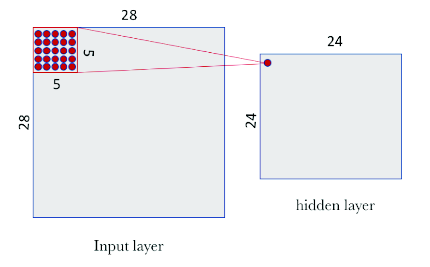

lo particular y muy importante de las redes convolucionales es
que se usa el mismo filtro (la misma matriz W de pesos y el mismo sesgo b)
para todas las neuronas de la capa oculta: en nuestro caso para las 24×24
neuronas (576 neuronas en total) de la primera capa. El lector puede ver en
este caso concreto que esta compartición reduce de manera drástica el
número de parámetros que tendría una red neuronal si no la hiciéramos.:
pasa de 14.400 parámetros que tendrían que ser ajustados (5×5x24×24) a 25
(5×5) parámetros más los sesgos b.

Pero un filtro definido por una matriz W y un sesgo b solo permiten detectar
una característica concreta en una imagen; por tanto, para poder realizar el
reconocimiento de imágenes se propone usar varios filtro a la vez, uno para
cada característica que queramos detectar.

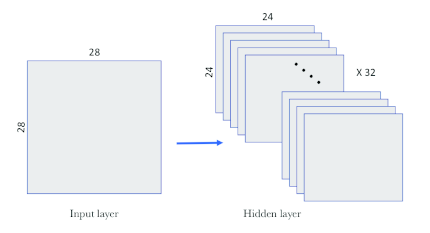

### Operación de *pooling*
Además de las capas convolucionales que acabamos de describir, las redes
neuronales convolucionales acompañan a la capa de convolución con unas
capas de pooling, que suelen ser aplicadas inmediatamente después de las
capas convolucionales. las capas de pooling hacen una simplificación de
142
la información recogida por la capa convolucional y crean una versión
condensada de la información contenida en estas.

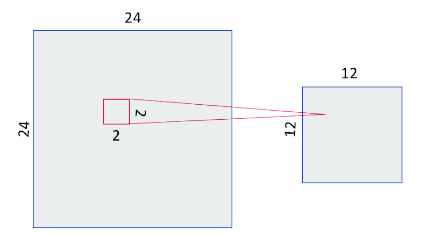

Hay varias maneras de condensar la información, pero una habitual, y que
usaremos en nuestro ejemplo, es la conocida como *max-pooling*, que como
valor se queda con el valor máximo de los que había en la ventana de entrada. También se puede utilizar *average-pooling* en lugar *max-pooling*, donde cada
grupo de puntos de entrada se transforma en el valor promedio del grupo de
puntos en vez de su valor máximo. Pero en general el *max-pooling* tiende a
funcionar mejor que las soluciones alternativas.

Tal como hemos mencionado anteriormente, la capa convolucional alberga
más de un filtro, y por tanto, como aplicamos el max-pooling a cada uno de
ellos separadamente, la capa de pooling contendrá tantos filtros de pooling como
de filtros convolucionales:

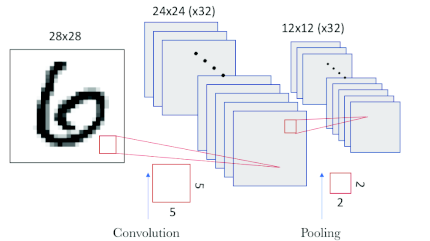

Pasemos a implementar nuestra primera red neuronal convolucional, que
consistirá en una convolución seguida de un max-pooling. En nuestro caso,
tendremos 32 filtros usando una ventana de 5×5 para la capa convolucional
y una ventana de 2×2 para la capa de pooling. Usaremos la función de
activación ReLU. En este caso, estamos configurando una red neuronal
convolucional para procesar un tensor de entrada de tamaño (28, 28, 1), que
es el tamaño de las imágenes MNIST (el tercer parámetro es el canal de
color que en nuestro caso es 1), y lo especificamos mediante el valor del
argumento input_shape=(28, 28,1) en nuestra primera capa

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


El *max-pooling* no requiere parámetros puesto que es una
operación matemática de encontrar el máximo

## Un modelo simple

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

'''Las capas de max_pooling no presentan costes por que simplemente elegin el 
mayor valor. Y además, nos sirve para ir reduciendo el tamanio de los filtros de
forma progresiva. En nuestro ejemplo, al hacer una capa de pooling con tamanio 
(2,2), consiguimos reducir a la mitad el tamanio de la capa anterior'''
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(5,5), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

''' Ahora debemos transformar el tensor 3D de la capa anterior a uno 1D para que
puede ser clasificado por la capa softmax'''
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

Una representación más visual de la anterior información se muestra en la
siguiente figura, donde vemos una representación gráfica de la forma de los
tensores que se pasan entre capas y sus conexiones:

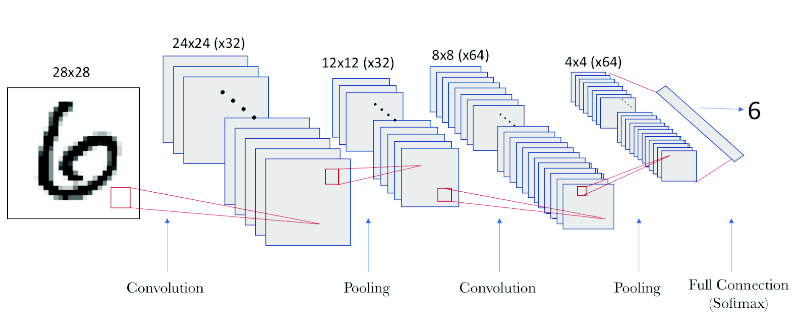

## Entrenamiento y evaluación del modelo

Una vez definido el modelo de la red neuronal estamos ya en disposición de
pasar a entrenar el modelo, es decir, ajustar los parámetros de todas las capas
convolucionales. A partir de aquí, para saber cuán bien lo hace nuestro
modelo

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

'''RESTRUCTURCION DE DATOS'''
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

'''CREACION DEL MODELO'''
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

'''CONFIGURACION DEL PROCESO DE APRENDIZAJE'''
model.fit(train_images, train_labels,
              batch_size=100,
              epochs=5,
              verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accryacy:', test_acc)

Epoch 1/5
600/600 [==============================] - 56s 92ms/step - loss: 0.1112 - accuracy: 0.9669
Epoch 2/5
600/600 [==============================] - 55s 92ms/step - loss: 0.1007 - accuracy: 0.9704
Epoch 3/5
600/600 [==============================] - 55s 92ms/step - loss: 0.0919 - accuracy: 0.9733
Epoch 4/5
600/600 [==============================] - 56s 93ms/step - loss: 0.0856 - accuracy: 0.9748
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0681 - accuracy: 0.9790
Test accryacy: 0.9789999723434448


### Argumentos del método fit
si no se especifica el argumento
validation_data, Keras usa el argumento validation_split, que es un entero entre
0 y 1 que especifica la fracción de los datos de entrenamiento que se deben
considerar como datos de validación

### Tamaño y número de filtros
El tamaño de la ventana (window_height × window_width) que mantiene
información de píxeles cercanos espacialmente es usualmente de 3×3 o 5×5.
El número de filtros que nos indica el número de características que
queremos manejar (output_depth) acostumbran a ser de 32 o 64:

Conv2D(output_depth, (window_height, window_width))

### Padding
Con padding podemos agregar ceros
alrededor de las imágenes de entrada antes de hacer deslizar la ventana por
ella.
En Keras, el padding en la capa Conv2D se configura con el argumento padding,
que puede tener dos valores: “same”, que indica que se añadan tantas filas y
columnas de ceros como sea necesario para que la salida tenga la misma
dimensión que la entrada; y “valid”, que indica no hacer padding (que es el
valor por defecto de este argumento en Keras).

### Stride
Otro hiperparámetro que podemos especificar en una capa convolucional es
el stride, que nos indica el número de pasos en que se mueve la ventada de
los filtros. Valores de stride grandes hacen decrecer el tamaño de la información que se
pasará la siguiente capa.

Pero en realidad los strides en convolucionales para reducir
los tamaños son raramente utilizados en la práctica; para ello se usan las
operaciones de pooling que hemos presentado antes. En Keras, el stride en la
capa Conv2D se configura con el argumento stride que tiene por defecto el
valor strides=(1, 1) que indica por separado el avance en las dos dimensiones

## Redes neuronales convolucionales con nombre propio

En realidad, Keras ofrece varios modelos preentrenados128 que como
veremos en la segunda parte del libro son muy útiles para lo que se conoce
transfer learning: Xception, VGG16, VGG19, ResNet50, InceptionV3,
InceptionResNetV2, MobileNet, DenseNet y NASNet.

In [ ]:
from tensorflow.keras.applications import VGG16

model = VGG16(weights='imagenet')
model.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            